# Group 2 Capstone Project

#### Import nessecary files

In [1]:
#! pip uninstall scikit-learn --yes
#! pip uninstall imblearn --yes
#! pip install scikit-learn==1.2.2
#! pip install imblearn

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
import imblearn

#### Read in dataset

https://www.kaggle.com/datasets/willianoliveiragibin/websites-e-comerce

E-commerce data set with columns: 'accessed_date', 'duration_(secs)', 'network_protocol', 'ip', 'bytes', 'accessed_Ffom', 'age', 'gender', 'country', 'membership', 'language','sales', 'returned_amount', 'pay_method' with target variable being 'returned'

In [2]:
#read
df = pd.read_csv("E-commerce Website Logs new.csv")
df.head()

c:\Users\scallejo\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,accessed_date,duration_(secs),network_protocol,ip,bytes,accessed_Ffom,age,gender,country,membership,language,sales,returned,returned_amount,pay_method
0,2017-03-14 17:43:57.172,2533,TCP,1.10.195.126,20100,Chrome,28,Female,CA,Normal,English,261.96,No,0,Credit Card
1,2017-03-14 17:43:57.172,4034,TCP,1.1.217.211,20500,Mozilla Firefox,21,Male,AR,Normal,English,731.94,No,0,Debit Card
2,2017-03-14 17:43:26.135,1525,TCP,1.115.198.107,90100,Mozilla Firefox,20,Male,PL,Normal,English,14.62,No,0,Cash
3,2017-03-14 17:43:26.135,4572,TCP,1.121.152.143,100300,Mozilla Firefox,66,Female,IN,Normal,Spanish,9.575.775,No,0,Credit Card
4,2017-03-14 18:17:09.005,3652,TCP,1.123.135.213,270200,Mozilla Firefox,53,Female,KR,Normal,Spanish,22.368,No,0,Cash


### Data Pre-processing

First, we went into the dataset and understood what each of the columns could contribute to our buisness problem. After thoroughly looking thorugh our options, we decided to drop 'network_protocol', 'ip', 'bytes', 'sales', and 'returned_amount'. The column 'network_protocol' didn't seem like a feature that would provide any useful information to our buisness problem as it does not give insght to any kind of marketing strategy or promotions. The column 'ip' only give a unique value for each data point and that would not be very useful for a model. The column 'bytes' was not defined when we were researching our dataset, thus we were not sure what the values represented whether it be the amount of bytes the customer was using when accessing the website or when purchasing the product, etc. so we deemed it so to remove this column as well. The columns 'sales' and 'returned_amount' are types of target variables that we had the choice of using, but decided against it. Since these columns are directly related to our target variable, wherein a 0 in sales can easily predict that the item was returned and a 0 in returned amount would predict the item is not returned, it would not provide our mode with useful information, thus we removed them.

In [3]:
#start prep
df.drop(['network_protocol', 'ip', 'bytes', 'sales', 'returned_amount'], axis=1, inplace=True)
df.head()

,accessed_date,duration_(secs),accessed_Ffom,age,gender,country,membership,language,returned,pay_method
0,2017-03-14 17:43:57.172,2533,Chrome,28,Female,CA,Normal,English,No,Credit Card
1,2017-03-14 17:43:57.172,4034,Mozilla Firefox,21,Male,AR,Normal,English,No,Debit Card
2,2017-03-14 17:43:26.135,1525,Mozilla Firefox,20,Male,PL,Normal,English,No,Cash
3,2017-03-14 17:43:26.135,4572,Mozilla Firefox,66,Female,IN,Normal,Spanish,No,Credit Card
4,2017-03-14 18:17:09.005,3652,Mozilla Firefox,53,Female,KR,Normal,Spanish,No,Cash


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172838 entries, 0 to 172837
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   accessed_date    172838 non-null  object
 1   duration_(secs)  172838 non-null  int64 
 2   accessed_Ffom    172838 non-null  object
 3   age              172838 non-null  object
 4   gender           172838 non-null  object
 5   country          172838 non-null  object
 6   membership       172838 non-null  object
 7   language         172838 non-null  object
 8   returned         172838 non-null  object
 9   pay_method       172838 non-null  object
dtypes: int64(1), object(9)
memory usage: 13.2+ MB


We can see that there are no null values detected from our initial search of finding them. We wanted to make sure that there were no place holders within each of the columns.

In [4]:
#remove non-integer values
df = df[df['age']!="--"] 

In [5]:
#turn age into integer
df['age'] = df['age'].astype('int64')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158095 entries, 0 to 172837
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   accessed_date    158095 non-null  object
 1   duration_(secs)  158095 non-null  int64 
 2   accessed_Ffom    158095 non-null  object
 3   age              158095 non-null  int64 
 4   gender           158095 non-null  object
 5   country          158095 non-null  object
 6   membership       158095 non-null  object
 7   language         158095 non-null  object
 8   returned         158095 non-null  object
 9   pay_method       158095 non-null  object
dtypes: int64(2), object(8)
memory usage: 13.3+ MB


In [6]:
#remove placeholders
df = df[df['age']!=0]

##### 2. Payment Method column

No need to deal with null, duplicates, or outliers

In [7]:
# Combine rows with 'Safari' and 'SafFRi'
df.loc[df['accessed_Ffom'] == 'SafFRi', 'accessed_Ffom'] = 'Safari'

# Check the updated 'accessed_Ffom' column
print("Updated accessed_Ffom:")
print(df['accessed_Ffom'].value_counts())

Updated accessed_Ffom:
Android App        18768
Chrome             13818
Mozilla Firefox    13015
Others             13007
IOS App            10627
Safari              8154
Microsoft Edge      7325
Name: accessed_Ffom, dtype: int64


In [8]:
# Capitalizing the first letter of each word
df['language'] = df['language'].str.split().str[0].str.capitalize()
print(df['language'].value_counts())

English       49939
Chinese       10172
Spanish        7124
Russian        6013
French         3972
Italian        3643
German          955
Japanese        599
Persian         400
Thai            361
Dutch           288
Portuguese      199
Arabic          186
Polish          123
Mongolian       114
Malayalam        95
Swahili          72
Nepali           71
Swedish          71
Norwegian        58
Slovak           48
Slovene          44
Urdu             39
Romanian         36
Malay            30
Macedonian       24
Serbian          14
Tegulu           13
Marathi          11
Name: language, dtype: int64


## Category Encoding

In [9]:
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['returned'] = le.fit_transform(df['returned'])

In [10]:
encoded_columns = ['accessed_Ffom', 'country', 'membership', 'language', 'pay_method']
ohe = pd.get_dummies(df[encoded_columns],prefix=encoded_columns, drop_first=True)
df_encoded = pd.concat([df, ohe], axis=1)
df_encoded = df_encoded.drop(encoded_columns,axis=1)

In [11]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84714 entries, 0 to 99456
Data columns (total 69 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   accessed_date                  84714 non-null  object
 1   duration_(secs)                84714 non-null  int64 
 2   age                            84714 non-null  int64 
 3   gender                         84714 non-null  int32 
 4   returned                       84714 non-null  int32 
 5   accessed_Ffom_Chrome           84714 non-null  bool  
 6   accessed_Ffom_IOS App          84714 non-null  bool  
 7   accessed_Ffom_Microsoft Edge   84714 non-null  bool  
 8   accessed_Ffom_Mozilla Firefox  84714 non-null  bool  
 9   accessed_Ffom_Others           84714 non-null  bool  
 10  accessed_Ffom_Safari           84714 non-null  bool  
 11  country_AR                     84714 non-null  bool  
 12  country_AT                     84714 non-null  bool  
 13  countr

## Train Test Split

In [11]:
from sklearn.model_selection import train_test_split
X = df_encoded.drop(["returned","accessed_date","duration_(secs)"], axis=1)
y = df_encoded.returned
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Model 1: Logistic Regression

#### Using Oversampled Set

In [15]:
#try 2 fits for this model one for over, one for under
logrego = LogisticRegression(random_state=0) #max_iter=175) # remove warning
logrego.fit(Xo_train, yo_train)

LogisticRegression(random_state=0)

In [16]:
logrego.score(Xo_train, yo_train) #train model score

0.5394193928676687

In [17]:
logrego.score(X_test, y_test) #unseen realistic data (bias)

0.4079512724868974

In [18]:
logrego.score(Xu_train, yu_train) #testing on undersampling set using the oversampling sets trained model

0.5417973396777334

In [19]:
logrego.score(X,y)

0.40942465235970443

### Grid Search

In [41]:
logreg = LogisticRegression(random_state=0)
grid={"solver":['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], "C":np.logspace(-3,3,7)}
search = GridSearchCV(logreg, grid, cv=10, scoring='accuracy')

#### Using Oversampled Set

In [42]:
search.fit(Xo_train, yo_train)

C:\Users\ARIKOHL\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ARIKOHL\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ARIKOHL\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn

C:\Users\ARIKOHL\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ARIKOHL\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

C:\Users\ARIKOHL\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ARIKOHL\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ARIKOHL\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn

C:\Users\ARIKOHL\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ARIKOHL\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ARIKOHL\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn

C:\Users\ARIKOHL\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ARIKOHL\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ARIKOHL\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ARIKOHL\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=0),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [43]:
search.best_score_ #accuary of best model

0.5362971793957085

In [44]:
search.best_params_ #params used to get best model

{'C': 1.0, 'solver': 'liblinear'}

In [45]:
search.best_estimator_

LogisticRegression(random_state=0, solver='liblinear')

In [26]:
logrego2 = LogisticRegression(solver='liblinear', random_state=0)

In [27]:
logrego2.fit(Xo_train, yo_train)

c:\Users\scallejo\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\scallejo\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\scallejo\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\scallejo\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a fu

LogisticRegression(random_state=0, solver='liblinear')

In [28]:
logrego2.score(Xo_train, yo_train)

c:\Users\scallejo\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\scallejo\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\scallejo\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\scallejo\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a fu

0.5385720601237842

In [29]:
logrego2.score(X_test, y_test)

c:\Users\scallejo\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\scallejo\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\scallejo\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\scallejo\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a fu

0.4070069408376222

In [30]:
logrego2.score(Xu_train, yu_train)

c:\Users\scallejo\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\scallejo\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\scallejo\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\scallejo\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a fu

0.5405536930896507

In [31]:
logrego2.score(X, y)

c:\Users\scallejo\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\scallejo\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\scallejo\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\scallejo\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a fu

0.4082796232027764

## Model 2: Random Forest

#### Using Oversampled Set

In [36]:
clfo = RandomForestClassifier(random_state=0)
clfo.fit(Xo_train, yo_train)

c:\Users\scallejo\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\scallejo\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\scallejo\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\scallejo\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a fu

RandomForestClassifier(random_state=0)

In [37]:
clfo.score(Xo_train, yo_train) #trained model score

c:\Users\scallejo\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\scallejo\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\scallejo\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\scallejo\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a fu

0.9587017388741527

In [38]:
clfo.score(X_test, y_test) #unseen data

c:\Users\scallejo\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\scallejo\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\scallejo\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\scallejo\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a fu

0.7395061145474291

In [39]:
clfo.score(Xu_train, yu_train) #testing on undersampling set using the oversampling sets trained model

c:\Users\scallejo\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\scallejo\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\scallejo\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\scallejo\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a fu

0.9572293716881151

In [40]:
clfo.score(X,y)

c:\Users\scallejo\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\scallejo\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\scallejo\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\scallejo\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a fu

0.8839152914512359

Random Forest model trained using the oversampled set is better than Logistic regression

### Grid Search

In [44]:
param_grid = { 
    'n_estimators': [25, 50, 100, 150], 
    'max_depth': [10, 15, 20, 25]
}

In [45]:
clf = RandomForestClassifier(random_state=0)
grid_search = GridSearchCV(clf, param_grid=param_grid)

#### Using Oversampled Set

In [74]:
grid_search.fit(Xo_train, yo_train)
print(grid_search.best_estimator_)

RandomForestClassifier(max_depth=25, n_estimators=150, random_state=0)


In [47]:
clf_grid = RandomForestClassifier(max_depth=25, n_estimators=150, random_state=0) #max_features= None, n_estimators=25
clf_grid.fit(Xo_train, yo_train) 
clf_grid.score(Xo_train, yo_train) #trained model score

c:\Users\scallejo\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\scallejo\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\scallejo\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\scallejo\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a fu

0.9494731800766284

In [48]:
clf_grid.score(X_test, y_test) #unseen data score (bias)

c:\Users\scallejo\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\scallejo\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\scallejo\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\scallejo\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a fu

0.7262854714575759

In [49]:
clf_grid.score(Xu_train, yu_train) #testing on undersampling set using the oversampling sets trained model

c:\Users\scallejo\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\scallejo\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\scallejo\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\scallejo\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a fu

0.9481994160268196

In [50]:
clf_grid.score(X, y)

c:\Users\scallejo\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\scallejo\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\scallejo\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\scallejo\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a fu

0.8710602733904668

## Final Model Picks

Due to how the scores were, using over sampling helps the model have more data to train on and the model that produced the best scores was the random forest model (with or without specific hyperparameters does not have a significant effect)

In [15]:
import warnings
warnings.filterwarnings("ignore")

In [16]:
# Use oversampling
clf_grid = RandomForestClassifier(max_depth=25, n_estimators=150, random_state=0) #max_features= None, n_estimators=25
clf_grid.fit(Xo_train, yo_train) 
clf_grid.score(Xo_train, yo_train) #trained model score

0.9494731800766284

In [18]:
clf_grid.score(X_test, y_test) #unseen data

0.7262854714575759

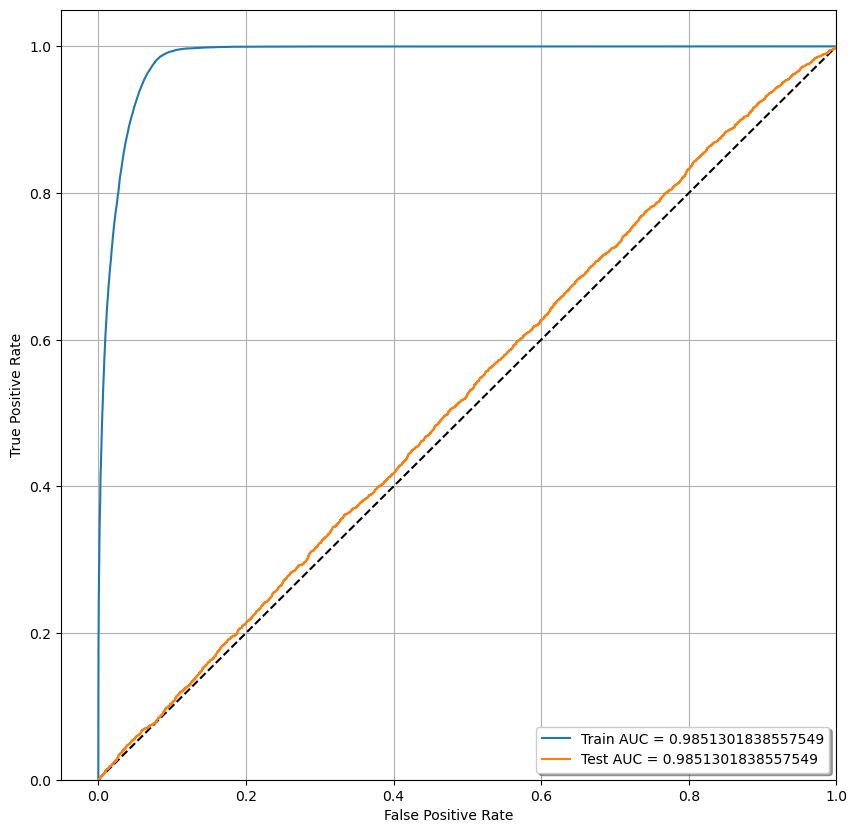

In [29]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# overall accuracy
acc = clf_grid.score(X_test,y_test)

# get roc/auc info
Y_score = clf_grid.predict_proba(Xo_train)[:,1]
fpr = dict()
tpr = dict()
fpr, tpr, _ = roc_curve(yo_train, Y_score)

roc_auc = dict()
roc_auc = auc(fpr, tpr)

Yt_score = clf_grid.predict_proba(X_test)[:,1]
fprt = dict()
tprt = dict()
fprt, tprt, _ = roc_curve(y_test, Yt_score)

roc_auct = dict()
roc_auct = auc(fpr, tpr)

# make the plot
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.plot(fpr, tpr, label='Train AUC = {0}'.format(roc_auc))  
plt.plot(fprt, tprt, label='Test AUC = {0}'.format(roc_auct))        
plt.legend(loc="lower right", shadow=True, fancybox =True) 
plt.show()

In [30]:
from sklearn.model_selection import KFold, cross_val_score

k_folds = KFold(n_splits = 5)

scores = cross_val_score(clf_grid, X, y, cv = k_folds)

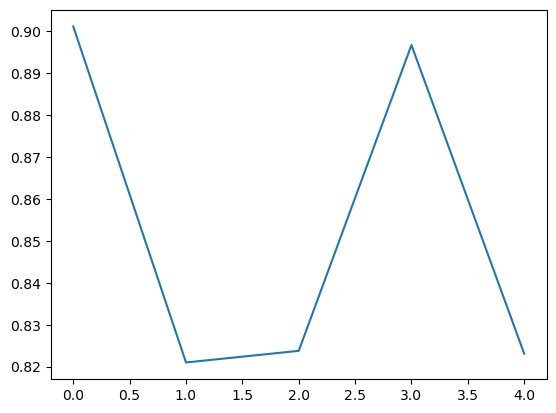

In [31]:
plt.plot(scores)

## Feature Importance

This is showing the coefficients of each of the columns/ features we have in our data set. It gives us information about how important the feature is to our target variable.

In [21]:
clf_grid.feature_names_in_

array(['age', 'gender', 'accessed_Ffom_Chrome', 'accessed_Ffom_IOS App',
       'accessed_Ffom_Microsoft Edge', 'accessed_Ffom_Mozilla Firefox',
       'accessed_Ffom_Others', 'accessed_Ffom_Safari', 'country_AR',
       'country_AT', 'country_AU', 'country_CA', 'country_CH',
       'country_CN', 'country_CO', 'country_DE', 'country_DK',
       'country_FI', 'country_FR', 'country_GB', 'country_IE',
       'country_IN', 'country_IT', 'country_JP', 'country_KR',
       'country_MX', 'country_NO', 'country_PE', 'country_PL',
       'country_PR', 'country_RU', 'country_SE', 'country_US',
       'country_ZA', 'membership_Premium', 'language_Chinese',
       'language_Dutch', 'language_English', 'language_French',
       'language_German', 'language_Italian', 'language_Japanese',
       'language_Macedonian', 'language_Malay', 'language_Malayalam',
       'language_Marathi', 'language_Mongolian', 'language_Nepali',
       'language_Norwegian', 'language_Persian', 'language_Polish',
       '

In [19]:
clf_grid.feature_importances_

array([4.91886765e-01, 5.05638095e-02, 2.13582364e-02, 1.44329148e-02,
       1.53445654e-02, 2.14054425e-02, 2.12995579e-02, 1.84401930e-02,
       4.68600118e-03, 6.91198882e-03, 6.06096398e-03, 9.13716804e-03,
       7.66126442e-03, 7.71380345e-03, 3.45873104e-03, 3.97047793e-03,
       1.11599101e-03, 2.28037323e-03, 4.43824164e-04, 6.16813638e-03,
       7.92350147e-04, 6.40703998e-03, 1.02752415e-02, 7.81795404e-03,
       4.08894065e-03, 2.60543177e-03, 5.40213501e-03, 2.43117939e-03,
       6.82719034e-03, 3.88207263e-03, 8.17515367e-03, 5.76417296e-03,
       1.03966582e-02, 3.43303904e-03, 4.80697242e-02, 2.07269507e-02,
       1.55192044e-03, 1.02599784e-02, 4.90181581e-03, 2.75305155e-03,
       4.68171786e-03, 2.61788748e-03, 2.38465259e-04, 3.28966681e-04,
       9.34568016e-04, 2.76160202e-04, 8.90640885e-04, 5.92170588e-04,
       3.35746866e-04, 2.00359548e-03, 1.10410702e-03, 1.21182791e-03,
       4.07905211e-04, 5.19950947e-03, 1.18109073e-04, 4.05996244e-04,
      

<Axes: >

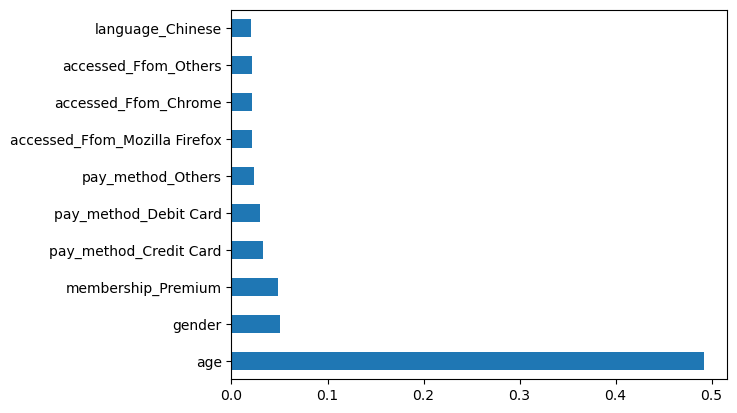

In [26]:
feat_importances = pd.Series(clf_grid.feature_importances_, index=Xo_train.columns)
feat_importances.nlargest(10).plot(kind='barh') #shows top nlargest important features

Age, gender, and the type of memebership seem to be the most important fearures that affect whether or not a customer returns a product or not. We should look into these more to find out informtaion how to use this data for our business scope

## SMOTE resampling for Unblanaced Data

In [ ]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
Xs_train, ys_train = oversample.fit_resample(X_train, y_train)

print(Counter(ys_train))

### Using SMOTE resampling for Log Reg

In [31]:
logregu = LogisticRegression(random_state=0)
logregu.fit(Xs_train, ys_train)

c:\Users\scallejo\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [32]:
logrego.score(Xs_train, ys_train) #train model score

0.5125257883878573

In [33]:
logrego.score(X_test, y_test) #unseen realistic data (bias)

0.4079512724868974

In [38]:
logregu2 = LogisticRegression(C=0.1, solver='liblinear', random_state=0)
logregu2.fit(Xs_train, ys_train)
logregu2.score(Xs_train, ys_train)

0.7762488947833776

In [39]:
logregu2.score(X_test, y_test) #unseen realistic data (bias)

0.7500826290193116

### Using SMOTE resampling for Random Forest

In [41]:
clfs = RandomForestClassifier(random_state=0)
clfs.fit(Xs_train, ys_train)
clfs.score(Xs_train, ys_train) #trained model score

0.945844385499558

In [42]:
clfs.score(X_test, y_test) #unseen realistic data (bias)

0.7121204967184476

In [46]:
grid_search.fit(Xs_train, ys_train)
print(grid_search.best_estimator_)

RandomForestClassifier(max_depth=25, n_estimators=150, random_state=0)


In [73]:
clf_grid = RandomForestClassifier(random_state=0) #max_depth=25, n_estimators=150, 
clf_grid.fit(Xs_train, ys_train) 
clf_grid.score(Xs_train, ys_train) #trained model score

0.945844385499558

In [74]:
clf_grid.score(X_test, y_test) #trained model score

0.7121204967184476

In [75]:
y_pred = clf_grid.predict(Xs_train)

In [76]:
from sklearn.metrics import classification_report

print(classification_report(ys_train, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94     54288
           1       0.93      0.96      0.95     54288

    accuracy                           0.95    108576
   macro avg       0.95      0.95      0.95    108576
weighted avg       0.95      0.95      0.95    108576



In [77]:
yt_pred = clf_grid.predict(X_test)

In [78]:
from sklearn.metrics import classification_report

print(classification_report(y_test, yt_pred))

              precision    recall  f1-score   support

           0       0.85      0.80      0.83     18053
           1       0.15      0.21      0.18      3126

    accuracy                           0.71     21179
   macro avg       0.50      0.50      0.50     21179
weighted avg       0.75      0.71      0.73     21179



In [79]:
from sklearn.metrics import roc_auc_score

print('ROCAUC score:',roc_auc_score(y_test, yt_pred))

ROCAUC score: 0.5043399528203708
